In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
base_dir = './'
data_dir = os.path.join(base_dir, 'data')
results_dir = os.path.join(base_dir, 'results')

ExternalGrid      0.201030
Renewables        3.866161
Conventionals     0.100000
SteelPlant       18.932660
Battery         -15.066499
Name: 2023-07-01 00:15:00, dtype: float64

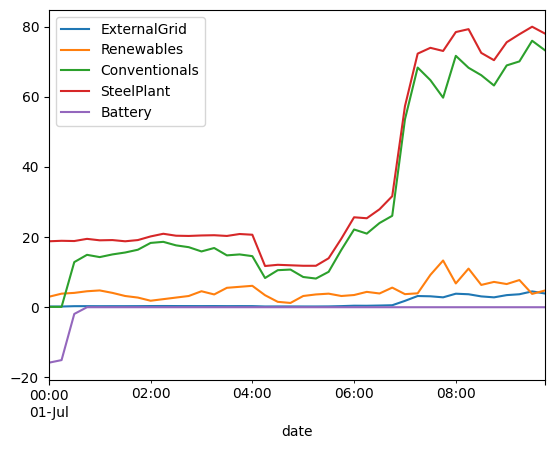

In [33]:
results = pd.read_csv(os.path.join(results_dir, 'results_A.csv'))\
            .rename(columns={'GridSim.ExternalGrid-0-ExternalGrid-P[MW]': 'ExternalGrid',
                            })
results['date'] = pd.to_datetime(results['date'], utc=False)
results.set_index('date', inplace=True)
results['Conventionals'] = results[[i for i in results.columns if 'Ctrl-0-PowerPlant' in i]].sum(1)
results['Renewables'] = results[[i for i in results.columns if 'Ctrl-0-PV' in i or 'Ctrl-0-WT' in i]].sum(1)
results['SteelPlant'] = results[[i for i in results.columns if 'Ctrl-0-SteelPlant' in i]].sum(1)
results['Battery'] = results[[i for i in results.columns if 'Ctrl-0-Battery-1-P[MW]' in i]].sum(1)
results['ExternalGrid'] = results['ExternalGrid']
results = results[[
        'ExternalGrid', 
        'Renewables',
        'Conventionals',
        'SteelPlant',
        'Battery',
        ]]
results.plot()
results.iloc[1]